In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('bbc_news_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [3]:
X = df['Text']
y = df['Category']

In [4]:
category_names = y.unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


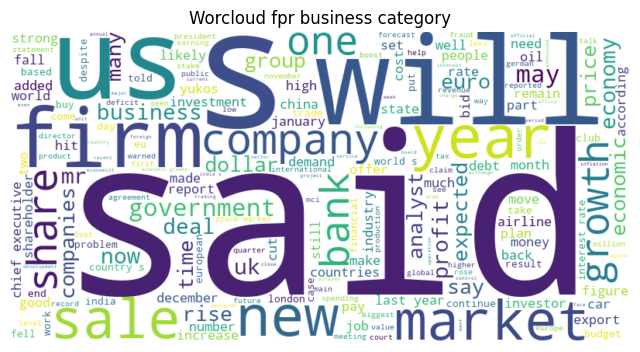

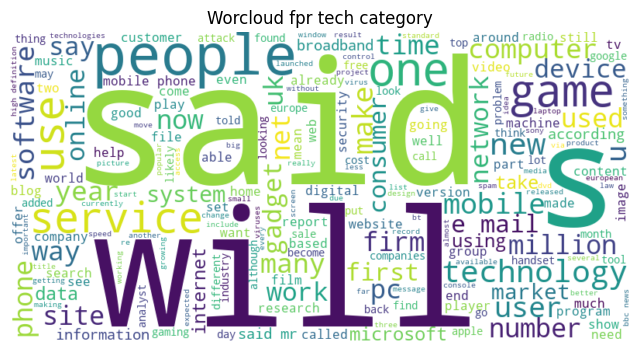

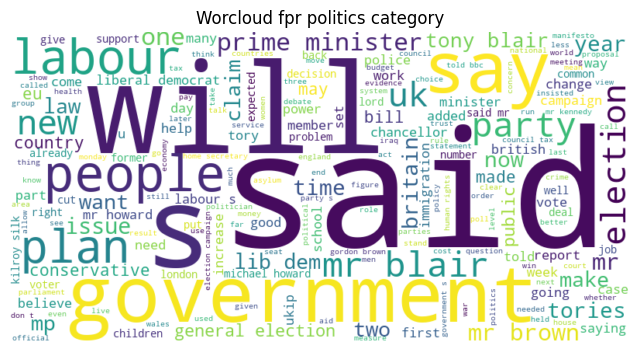

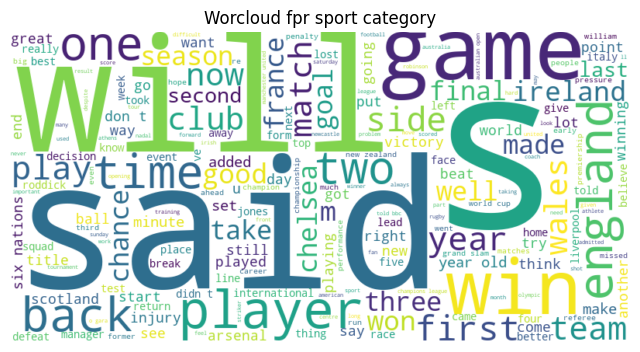

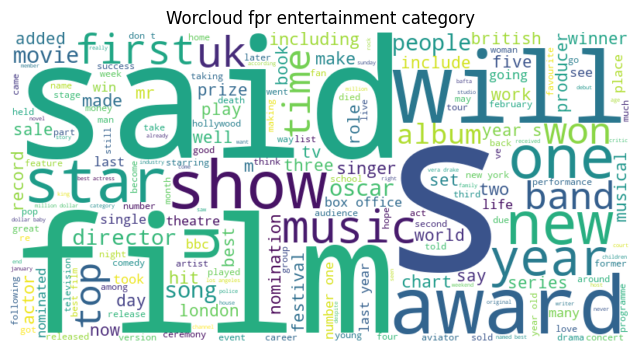

In [5]:
for category in category_names:
    text = " ".join(df[df['Category'] == category]['Text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Worcloud fpr {category} category')
    plt.axis("off")
    plt.show()


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punk')
nltk.download('stopword')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Error loading punk: Package 'punk' not found in index
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
leamatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)
                 

{'few', "mustn't", 'from', 'am', 'wasn', 'just', 'where', "i'm", 'needn', 'to', 'do', 'here', 'me', 'aren', 'more', 'down', "haven't", 'hers', "you'll", 'your', 'yourselves', 'through', "wasn't", 'shouldn', 'below', "weren't", 'nor', "we'd", 'the', 'its', "we've", 'a', 'ourselves', 've', 'out', 'between', 're', 'd', 'such', 'further', 'theirs', 'which', 'won', 'after', "we'll", 'yourself', 'herself', 'by', 'not', "he'll", 'under', 'himself', "they've", 'isn', "won't", 't', 'having', 'his', "i'll", "she'll", 'myself', 'of', 'both', "couldn't", 'then', 'as', "isn't", 'very', 'be', 'and', 'he', 'about', 'other', 'my', "you're", 'now', "she's", 'because', 'our', 'why', "should've", 'so', 'some', 'this', 'whom', "you'd", "doesn't", "that'll", 'she', 'will', 'being', 's', 'they', 'was', 'against', 'own', 'than', 'had', 'off', "they'd", 'again', 'up', "wouldn't", "you've", 'on', 'are', "she'd", 'no', 'them', "needn't", 'it', 'mightn', 'that', 'any', 'has', 'only', 'we', "don't", 'y', "i'd", '

In [8]:
leamatizer.lemmatize(word='sleeping', pos='v')
                     

'sleep'

In [9]:
text="Ram is a good boy"
words = word_tokenize(text)
print(words)

['Ram', 'is', 'a', 'good', 'boy']


In [10]:
import re


In [11]:
def preprocess_text(text):
    #lowercasing
    text = text.lower()
    #remove special character and puunctuation
    text =re.sub(r'[^a-zA-Z\s]','',text)
    #tokenization
    words = word_tokenize(text)
    #Remove stopwords and leamatize
    words =(leamatizer.lemmatize(word) for word in words if word not in stop_words)
    #join back into a string
    return " ".join(words)

In [12]:
text = "Hey.there! It's so good to see you :)!!"
print(preprocess_text(text))

heythere good see


In [13]:
#Apply preprocessing function to the dataset
df['Text'] =df['Text'].apply(preprocess_text) 

In [14]:
X=df['Text']
y= df['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.pipeline import make_pipeline
nb_model =make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds = nb_model.predict(X_test)
print(f'Accuracy ={accuracy_score_test,( y_test, y_preds)*100}')
print(f'Classification Report \n {classification_report(y_test,y_preds)}')

NameError: name 'TfidfVectorizer' is not defined

In [17]:
import joblib
joblib.dump(nb_model, 'nb_model.pkl')

['nb_model.pkl']